In [4]:
#import liberarys
import numpy as np
import pandas as pd
import os
import cv2
import glob
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import pickle
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


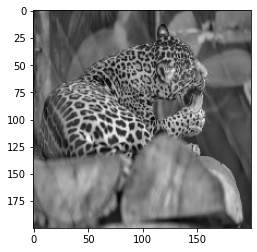

(200, 200)


In [6]:
DATADIR = "data_set"
CATEGORIES = ["Leopard","Jaguar"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array =cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
#        plt.imshow(img_array, cmap="gray")
#        plt.show()
#        break
#    break

IMG_SIZE = 200
new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
plt.imshow(new_array,cmap='gray')
plt.show()
print(new_array.shape)

In [7]:
training_data=[]

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array =cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
            training_data.append([new_array,class_num])
create_training_data()     

In [8]:
print(len(training_data))

102


In [13]:
random.shuffle(training_data)
for sample in training_data[:10]:
    print(sample[1])

0
0
1
1
1
0
0
0
0
0


In [14]:
x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x = np.array(x).reshape(-1,IMG_SIZE,IMG_SIZE,1)
pickle_out = open("X.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [48]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(80))
model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
y = np.array(y)
history=model.fit(X, y, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
3/3 [==============================] - 21s 6s/step - loss: 4.2156 - accuracy: 0.4938 - val_loss: 2.6441 - val_accuracy: 0.4286
Epoch 2/20
3/3 [==============================] - 18s 6s/step - loss: 1.4648 - accuracy: 0.4938 - val_loss: 0.6931 - val_accuracy: 0.5238
Epoch 3/20
3/3 [==============================] - 16s 5s/step - loss: 0.6885 - accuracy: 0.7037 - val_loss: 0.6942 - val_accuracy: 0.4286
Epoch 4/20
3/3 [==============================] - 16s 5s/step - loss: 0.7790 - accuracy: 0.4938 - val_loss: 0.6896 - val_accuracy: 0.6190
Epoch 5/20
3/3 [==============================] - 16s 5s/step - loss: 0.6450 - accuracy: 0.7407 - val_loss: 0.6941 - val_accuracy: 0.5714
Epoch 6/20
3/3 [==============================] - 16s 5s/step - loss: 0.6309 - accuracy: 0.6173 - val_loss: 0.6808 - val_accuracy: 0.6190
Epoch 7/20
3/3 [==============================] - 16s 5s/step - loss: 0.5846 - accuracy: 0.7160 - val_loss: 0.7361 - val_accuracy: 0.4286
Epoch 8/20
3/3 [==================

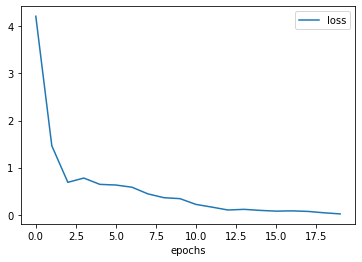

In [49]:
# Showing plot for loss
plt.plot(history.history['loss'])
plt.xlabel('epochs')
plt.legend(['loss'])
plt.show()

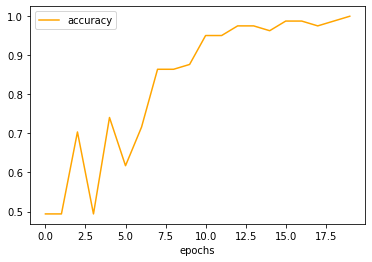

In [50]:
plt.plot(history.history['accuracy'], color='orange')
plt.xlabel('epochs')
plt.legend(['accuracy'])
plt.show()

In [57]:

#test imgs build

def prepare(filepath):
    test_imgs=cv2.imread(filepath,cv2.IMREAD_GRAYSCALE)
    new__array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
    return new__array.reshape(-1,IMG_SIZE,IMG_SIZE,1)

predicted_probabilities = model.predict([prepare('Leopard 2.jpg')])
print(CATEGORIES[int(predicted_probabilities[0][0])])


Jaguar
